In [2]:
# Importing libraries and Setting Dislplay Options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats


from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score


#Setting Options
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [3]:
#Reading result from Pickle File as a data frame
result = pd.read_pickle("PlayerListInitialPickle")

In [4]:
#Reading Final Player List
player_list= pd.read_pickle("PlayerListFinalPickle")
player_list

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,Z. Ibrahimović,37,85,85,Milan,196.0,95.0,Right,85,ST,0,14.00,0.0580,23.80,400,68,86,80,78,88,397,80,80,78,73,86,304,56,55,72,82,39,392,90,68,59,87,88,368,84,20,91,84,89,90,89,28,37,24,59,13,15,10,9,12,2009,411,5,55,88,77,79,34,78
1,A. Kanno,29,62,62,Al Fayha,180.0,67.0,Right,62,CB,0,0.25,0.0040,0.41,201,33,24,60,55,29,203,50,28,24,48,53,294,56,61,63,54,60,285,37,86,66,71,25,231,60,58,28,49,36,52,185,61,62,62,54,12,7,14,9,12,1453,314,1,59,28,45,53,61,68
2,Brahim,19,74,86,Real Madrid,170.0,68.0,Left,75,CAM,12,10.00,0.0630,22.50,286,60,69,30,72,55,332,82,72,47,50,81,394,78,75,83,70,88,291,70,65,54,35,67,258,41,20,69,70,58,72,87,43,23,21,51,13,9,13,10,6,1699,362,1,76,68,65,82,29,42
3,M. Aarons,19,73,85,Norwich City,178.0,73.0,Right,74,RB,12,6.50,0.0170,14.30,269,64,41,53,70,41,286,73,50,32,57,74,393,84,80,82,68,79,274,46,49,79,64,36,284,68,69,64,56,27,75,217,74,73,70,46,11,11,7,9,8,1769,396,1,82,41,61,74,70,68
4,J. David,19,77,88,KAA Gent,178.0,77.0,Right,79,ST,11,15.00,0.0130,25.50,363,63,81,72,76,71,320,79,56,34,73,78,399,85,87,78,71,78,379,75,80,81,74,69,268,25,17,75,73,78,83,61,21,21,19,39,7,7,11,7,7,1829,400,1,86,76,69,78,25,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19301,C. Timite,21,67,74,Paris FC,178.0,79.0,Right,68,ST,7,1.10,0.0030,0.00,295,59,62,61,59,54,280,70,48,40,54,68,373,82,80,75,62,74,325,76,67,65,69,48,255,50,30,67,52,56,57,101,30,33,38,47,9,7,11,10,10,1676,367,1,81,62,55,70,35,64
19302,17 D. Bravo,18,56,69,San Luis de Quillota,173.0,70.0,Left,55,LB,13,0.15,0.0005,0.00,189,49,30,45,45,20,213,55,32,30,43,53,321,70,68,66,45,72,260,35,65,75,57,28,194,40,50,40,31,33,45,165,51,55,59,40,7,13,7,6,7,1382,308,1,69,31,41,56,52,59
19303,K. Miyoshi,22,71,78,Royal Antwerp FC,168.0,64.0,Left,72,CAM,7,3.30,0.0070,0.00,301,68,65,37,70,61,335,71,69,63,62,70,419,92,74,94,70,89,349,68,90,71,51,69,253,43,26,57,71,56,57,117,38,35,44,49,8,9,15,7,10,1823,380,1,82,65,68,74,35,56
19304,18 F. Banega,20,61,73,San Martín de San Juan,170.0,62.0,Right,63,CAM,12,0.45,0.0020,0.00,249,49,45,49,69,37,262,61,39,35,61,66,362,71,68,85,61,77,254,44,71,65,31,43,259,52,43,55,68,41,41,153,48,55,50,51,13,12,6,10,10,1590,334,1,69,44,60,66,49,46


In [5]:
#Changing columns order
player_list = player_list[['Name','Value','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
                           'Position','Growth','Wage','Release_Clause','Attacking','Crossing','Finishing',
                           'Heading_Accuracy','Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy',
                           'Long_Passing','Ball_Control','Movement','Acceleration','Sprint_Speed','Agility',
                           'Reactions','Balance','Power','Shot_Power','Jumping','Stamina','Strength','Long_Shots',
                           'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                           'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving',
                           'GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats',
                           'Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']]
player_list

,Name,Value,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,Z. Ibrahimović,14.00,37,85,85,Milan,196.0,95.0,Right,85,ST,0,0.0580,23.80,400,68,86,80,78,88,397,80,80,78,73,86,304,56,55,72,82,39,392,90,68,59,87,88,368,84,20,91,84,89,90,89,28,37,24,59,13,15,10,9,12,2009,411,5,55,88,77,79,34,78
1,A. Kanno,0.25,29,62,62,Al Fayha,180.0,67.0,Right,62,CB,0,0.0040,0.41,201,33,24,60,55,29,203,50,28,24,48,53,294,56,61,63,54,60,285,37,86,66,71,25,231,60,58,28,49,36,52,185,61,62,62,54,12,7,14,9,12,1453,314,1,59,28,45,53,61,68
2,Brahim,10.00,19,74,86,Real Madrid,170.0,68.0,Left,75,CAM,12,0.0630,22.50,286,60,69,30,72,55,332,82,72,47,50,81,394,78,75,83,70,88,291,70,65,54,35,67,258,41,20,69,70,58,72,87,43,23,21,51,13,9,13,10,6,1699,362,1,76,68,65,82,29,42
3,M. Aarons,6.50,19,73,85,Norwich City,178.0,73.0,Right,74,RB,12,0.0170,14.30,269,64,41,53,70,41,286,73,50,32,57,74,393,84,80,82,68,79,274,46,49,79,64,36,284,68,69,64,56,27,75,217,74,73,70,46,11,11,7,9,8,1769,396,1,82,41,61,74,70,68
4,J. David,15.00,19,77,88,KAA Gent,178.0,77.0,Right,79,ST,11,0.0130,25.50,363,63,81,72,76,71,320,79,56,34,73,78,399,85,87,78,71,78,379,75,80,81,74,69,268,25,17,75,73,78,83,61,21,21,19,39,7,7,11,7,7,1829,400,1,86,76,69,78,25,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19301,C. Timite,1.10,21,67,74,Paris FC,178.0,79.0,Right,68,ST,7,0.0030,0.00,295,59,62,61,59,54,280,70,48,40,54,68,373,82,80,75,62,74,325,76,67,65,69,48,255,50,30,67,52,56,57,101,30,33,38,47,9,7,11,10,10,1676,367,1,81,62,55,70,35,64
19302,17 D. Bravo,0.15,18,56,69,San Luis de Quillota,173.0,70.0,Left,55,LB,13,0.0005,0.00,189,49,30,45,45,20,213,55,32,30,43,53,321,70,68,66,45,72,260,35,65,75,57,28,194,40,50,40,31,33,45,165,51,55,59,40,7,13,7,6,7,1382,308,1,69,31,41,56,52,59
19303,K. Miyoshi,3.30,22,71,78,Royal Antwerp FC,168.0,64.0,Left,72,CAM,7,0.0070,0.00,301,68,65,37,70,61,335,71,69,63,62,70,419,92,74,94,70,89,349,68,90,71,51,69,253,43,26,57,71,56,57,117,38,35,44,49,8,9,15,7,10,1823,380,1,82,65,68,74,35,56
19304,18 F. Banega,0.45,20,61,73,San Martín de San Juan,170.0,62.0,Right,63,CAM,12,0.0020,0.00,249,49,45,49,69,37,262,61,39,35,61,66,362,71,68,85,61,77,254,44,71,65,31,43,259,52,43,55,68,41,41,153,48,55,50,51,13,12,6,10,10,1590,334,1,69,44,60,66,49,46


In [6]:
# Slice data into faeture and target

Xb= player_list.drop(columns=["Value","Name","Team","Foot","Position"])
yb= player_list.loc[:,"Value"]

In [7]:
# fit model with target as player market value 
player_modelb = sm.OLS(yb, Xb, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              7422.
Date:                Thu, 04 May 2023   Prob (F-statistic):                        0.00
Time:                        11:32:15   Log-Likelihood:                         -29609.
No. Observations:               17779   AIC:                                  5.932e+04
Df Residuals:                   17730   BIC:                                  5.970e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


C:\Users\adhna\AppData\Local\Temp\ipykernel_21028\515352127.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')


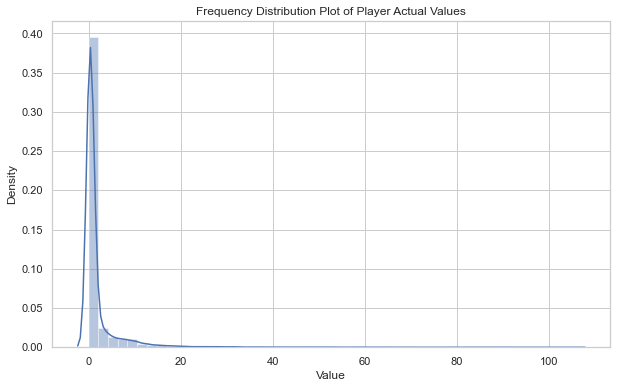

In [8]:
x = player_list.Value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

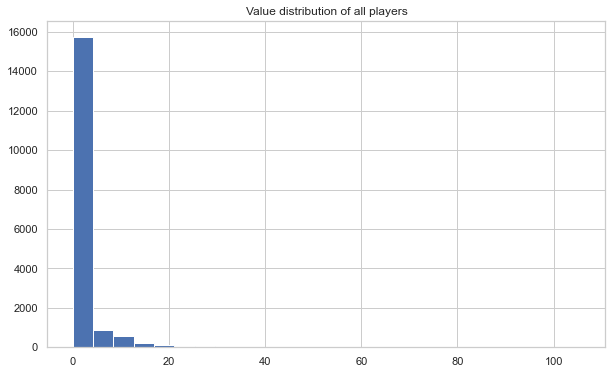

In [9]:
plt.figure(1, figsize=(10, 6))
sns.set(style="whitegrid")
plt.hist( x= 'Value', bins=25,data=player_list)
plt.title('Value distribution of all players')
plt.show()

In [14]:
regressor = LinearRegression()
regressor.fit(X,y)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df.sort_values("Coefficient",ascending=False).T

NameError: name 'X' is not defined

In [13]:
Xb

,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,37,85,85,196.0,95.0,85,0,0.0580,23.80,400,68,86,80,78,88,397,80,80,78,73,86,304,56,55,72,82,39,392,90,68,59,87,88,368,84,20,91,84,89,90,89,28,37,24,59,13,15,10,9,12,2009,411,5,55,88,77,79,34,78
1,29,62,62,180.0,67.0,62,0,0.0040,0.41,201,33,24,60,55,29,203,50,28,24,48,53,294,56,61,63,54,60,285,37,86,66,71,25,231,60,58,28,49,36,52,185,61,62,62,54,12,7,14,9,12,1453,314,1,59,28,45,53,61,68
2,19,74,86,170.0,68.0,75,12,0.0630,22.50,286,60,69,30,72,55,332,82,72,47,50,81,394,78,75,83,70,88,291,70,65,54,35,67,258,41,20,69,70,58,72,87,43,23,21,51,13,9,13,10,6,1699,362,1,76,68,65,82,29,42
3,19,73,85,178.0,73.0,74,12,0.0170,14.30,269,64,41,53,70,41,286,73,50,32,57,74,393,84,80,82,68,79,274,46,49,79,64,36,284,68,69,64,56,27,75,217,74,73,70,46,11,11,7,9,8,1769,396,1,82,41,61,74,70,68
4,19,77,88,178.0,77.0,79,11,0.0130,25.50,363,63,81,72,76,71,320,79,56,34,73,78,399,85,87,78,71,78,379,75,80,81,74,69,268,25,17,75,73,78,83,61,21,21,19,39,7,7,11,7,7,1829,400,1,86,76,69,78,25,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19301,21,67,74,178.0,79.0,68,7,0.0030,0.00,295,59,62,61,59,54,280,70,48,40,54,68,373,82,80,75,62,74,325,76,67,65,69,48,255,50,30,67,52,56,57,101,30,33,38,47,9,7,11,10,10,1676,367,1,81,62,55,70,35,64
19302,18,56,69,173.0,70.0,55,13,0.0005,0.00,189,49,30,45,45,20,213,55,32,30,43,53,321,70,68,66,45,72,260,35,65,75,57,28,194,40,50,40,31,33,45,165,51,55,59,40,7,13,7,6,7,1382,308,1,69,31,41,56,52,59
19303,22,71,78,168.0,64.0,72,7,0.0070,0.00,301,68,65,37,70,61,335,71,69,63,62,70,419,92,74,94,70,89,349,68,90,71,51,69,253,43,26,57,71,56,57,117,38,35,44,49,8,9,15,7,10,1823,380,1,82,65,68,74,35,56
19304,20,61,73,170.0,62.0,63,12,0.0020,0.00,249,49,45,49,69,37,262,61,39,35,61,66,362,71,68,85,61,77,254,44,71,65,31,43,259,52,43,55,68,41,41,153,48,55,50,51,13,12,6,10,10,1590,334,1,69,44,60,66,49,46


In [12]:
player_modelb = sm.OLS(yb, Xb, data=player_list)

resultsb = player_modelb.fit()

print(resultsb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              7422.
Date:                Thu, 04 May 2023   Prob (F-statistic):                        0.00
Time:                        11:35:57   Log-Likelihood:                         -29609.
No. Observations:               17779   AIC:                                  5.932e+04
Df Residuals:                   17730   BIC:                                  5.970e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

C:\Users\adhna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


In [20]:
result = pd.read_pickle("PlayerListInitialPickle")

result = result[0].str.split(',',expand=True)
result[1] = result[1].str.replace("\n ","")
chars_to_remove = ["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM","RW","RF","CF","LF","LW","LS","ST","RS"]
for char in chars_to_remove:
    result[1]=result[1].str.replace(char,"")
    result[1]=result[1].str.lstrip()

result[5] = result[5].str.replace("\n\n\n\n","")
result[5] = result[5].str.split("\n").str[0]
result[5] = result[5].str.strip()
result[6] = result[6].replace(r'Loan', np.nan, regex=True)
result = result.iloc[1:]

result_WoLoan = result[result[6].notna()]
result_WoLoan.drop(result_WoLoan.columns[[0,6,66,67,68,69]],axis=1, inplace=True)


result

IndexError: index 66 is out of bounds for axis 0 with size 12

In [24]:
result = pd.read_pickle("C:/Users/adhna/OneDrive/Desktop/MarketValuesOfFootballPlayers-master/PlayerListInitialPickle")
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
1,[\n,Z. Ibrahimović,37,85,85,Milan,41236,"6'5""",209lbs,Right,85,ST,0,€14M,€58K,€23.8M,400,68,86,80,78,88,397,80,80,78,73,86,304,56,55,72,82,39,392,90,68,59,87,88,368,84,20,91,84,89,90,89,28,37,24,59,13,15,10,9,12,2009,411,5 ★,55,88,77,79,34,78,\n183],None,None,None
2,[\n,A. Kanno,29,62,62,Al Fayha,228625,"5'11""",148lbs,Right,62,CB,0,€250K,€4K,€413K,201,33,24,60,55,29,203,50,28,24,48,53,294,56,61,63,54,60,285,37,86,66,71,25,231,60,58,28,49,36,52,185,61,62,62,54,12,7,14,9,12,1453,314,1 ★,59,28,45,53,61,68,\n118],None,None,None
3,[\n,Brahim,19,74,86,Real Madrid,231410,"5'7""",150lbs,Left,75,CAM,12,€10M,€63K,€22.5M,286,60,69,30,72,55,332,82,72,47,50,81,394,78,75,83,70,88,291,70,65,54,35,67,258,41,20,69,70,58,72,87,43,23,21,51,13,9,13,10,6,1699,362,1 ★,76,68,65,82,29,42,\n108],None,None,None
4,[\n,M. Aarons,19,73,85,Norwich City,240060,"5'10""",161lbs,Right,74,RB,12,€6.5M,€17K,€14.3M,269,64,41,53,70,41,286,73,50,32,57,74,393,84,80,82,68,79,274,46,49,79,64,36,284,68,69,64,56,27,75,217,74,73,70,46,11,11,7,9,8,1769,396,1 ★,82,41,61,74,70,68,\n93],None,None,None
5,[\n,J. David,19,77,88,KAA Gent,243630,"5'10""",170lbs,Right,79,ST,11,€15M,€13K,€25.5M,363,63,81,72,76,71,320,79,56,34,73,78,399,85,87,78,71,78,379,75,80,81,74,69,268,25,17,75,73,78,83,61,21,21,19,39,7,7,11,7,7,1829,400,1 ★,86,76,69,78,25,66,\n75],None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30220,[\n,N. Zaniolo,19,77,87,Roma,238067,"6'3""",174lbs,Left,78,CAM,10,€14M,€23K,€26.6M,336,64,74,60,78,60,351,78,65,60,70,78,381,76,78,72,78,77,365,79,60,76,78,72,350,80,57,77,76,60,70,188,64,64,60,48,8,11,11,13,5,2019,438,1 ★,77,73,72,77,62,77,\n27],None,None,None
30229,[\n,W. McKennie,20,76,86,FC Schalke 04,238744,"6'1""",185lbs,Right,80,CB,10,€12.5M,€22K,€23.8M,323,57,59,82,76,49,330,74,56,55,69,76,364,67,83,67,78,69,399,73,92,83,83,68,364,82,74,75,75,58,68,224,75,76,73,48,7,9,12,9,11,2052,442,1 ★,76,64,69,74,76,83,\n25],None,None,None
30352,[\n,A. Hložek,16,74,88,Sparta Praha,246618,"6'1""",176lbs,Right,75,RM,14,€11M,€500,€31.1M,346,67,68,71,70,70,348,76,68,64,65,75,376,79,76,70,73,78,363,74,70,74,75,70,302,69,26,73,70,64,72,82,25,34,23,51,11,10,9,11,10,1868,395,1 ★,77,70,68,75,32,73,\n24],None,None,None
30361,[\n,S. Tonali,19,77,91,Brescia,241096,"5'11""",176lbs,Right,78,CM,14,€18M,€8K,€43.7M,341,70,60,69,82,60,386,76,75,75,81,79,384,83,78,74,74,75,364,75,64,75,80,70,352,76,74,60,78,64,74,216,70,74,72,44,13,9,8,7,7,2087,449,1 ★,80,65,78,77,72,77,\n80],None,None,None


In [22]:
result = result[0].str.split(',',expand=True)
result

,0,1,2,3,4,5,6,7,8,9,10,11
0,[],None,None,None,None,None,None,None,None,None,None,None
1,[\n,\nE. Dick GK,27,58,60,\n\n\n\nMinnesota United\n2022 ~ 2023\n\n,€190K,€1K,1003],None,None,None
2,[\n\nFIFA 23 Apr 27,202374 75 Short passing89 93 Reactions87 8...,\nE. Haaland ST,21,90,94,\n\n\n\nManchester City\n2022 ~ 2027\n\n,€176.5M,€240K,2144],None,None
3,[\n,\nA. Mac Allister CM CAM CDM,23,80,84,\n\n\n\nBrighton &amp; Hove Albion\n2019 ~ 20...,€30M,€65K,2160],None,None,None
4,[\n\nFIFA 23 Apr 27,202340 56 Crossing78 80 Finishing63 67 Hea...,\nF. Balogun ST,20,75,84,\n\n\n\nStade de Reims \nJun 30,2023 On loan\n\n,€12.5M,€52K,1738],None
...,...,...,...,...,...,...,...,...,...,...,...,...
20326,[\n,\n22 J. Orellana LB,23,67,74,\n\n\n\nBolívar\n2021 ~ 2021\n\n,€1.9M,€500,1633],None,None,None
20371,[\n,\nT. Abraham ST,24,81,85,\n\n\n\nRoma\n2021 ~ 2026\n\n,€37.5M,€71K,1920],None,None,None
20379,[\n,\nJ. Álvarez ST RW,22,79,86,\n\n\n\nManchester City\n2022 ~ 2027\n\n,€36M,€110K,2129],None,None,None
21241,[\n\nFIFA 23 Apr 27,202369 70 Dribbling78 82 Sprint speed76 78...,\nC. Lukeba CB,19,77,85,\n\n\n\nOlympique Lyonnais\n2021 ~ 2025\n\n,€21M,€27K,1868],None,None
